In [170]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.patches as mpatches
pd.options.mode.chained_assignment = None  # default='warn'


In [171]:
#reading the .csv files - Jhon
df_app = pd.read_csv('D:/OneDrive/Programacion/coderhouse/coderhouse-proyecto-final/datasets/credit_card/application_data.csv')

In [172]:
#Checking for th unique values in each column
app_data = df_app.dropna(axis=1)
app_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR

In [173]:
#a quick look for the shape of the data
df_app.shape

(307511, 122)

In [174]:
#here we see the missing values in each column
df_app.head(9)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [175]:
#a view of the format of each column
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [176]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [177]:
#here we see the missing values in each column
pd.DataFrame(df_app.isna().sum(),columns=['Missings'])

,Missings
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [178]:
#analysis for GENDER of the clients and AMT columns
dfA = {}
for i in df_app:
    if 'CODE_GENDER' in i:
        dfA[i] = df_app[i]
    elif 'AMT' in i:
        dfA[i] = df_app[i]
    elif 'TARGET' in i:
        dfA[i] = df_app[i]

In [179]:
#here we need to limit the data for plotting
dfA = pd.DataFrame(dfA)
dfA.shape
dfB = dfA.iloc[:100000,:]

In [180]:
dfB.shape

(100000, 12)

In [181]:
dfB.head()

,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,M,202500.0,406597.5,24700.5,351000.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,F,270000.0,1293502.5,35698.5,1129500.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,M,67500.0,135000.0,6750.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,F,135000.0,312682.5,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M,121500.0,513000.0,21865.5,513000.0,0.0,0.0,0.0,0.0,0.0,0.0


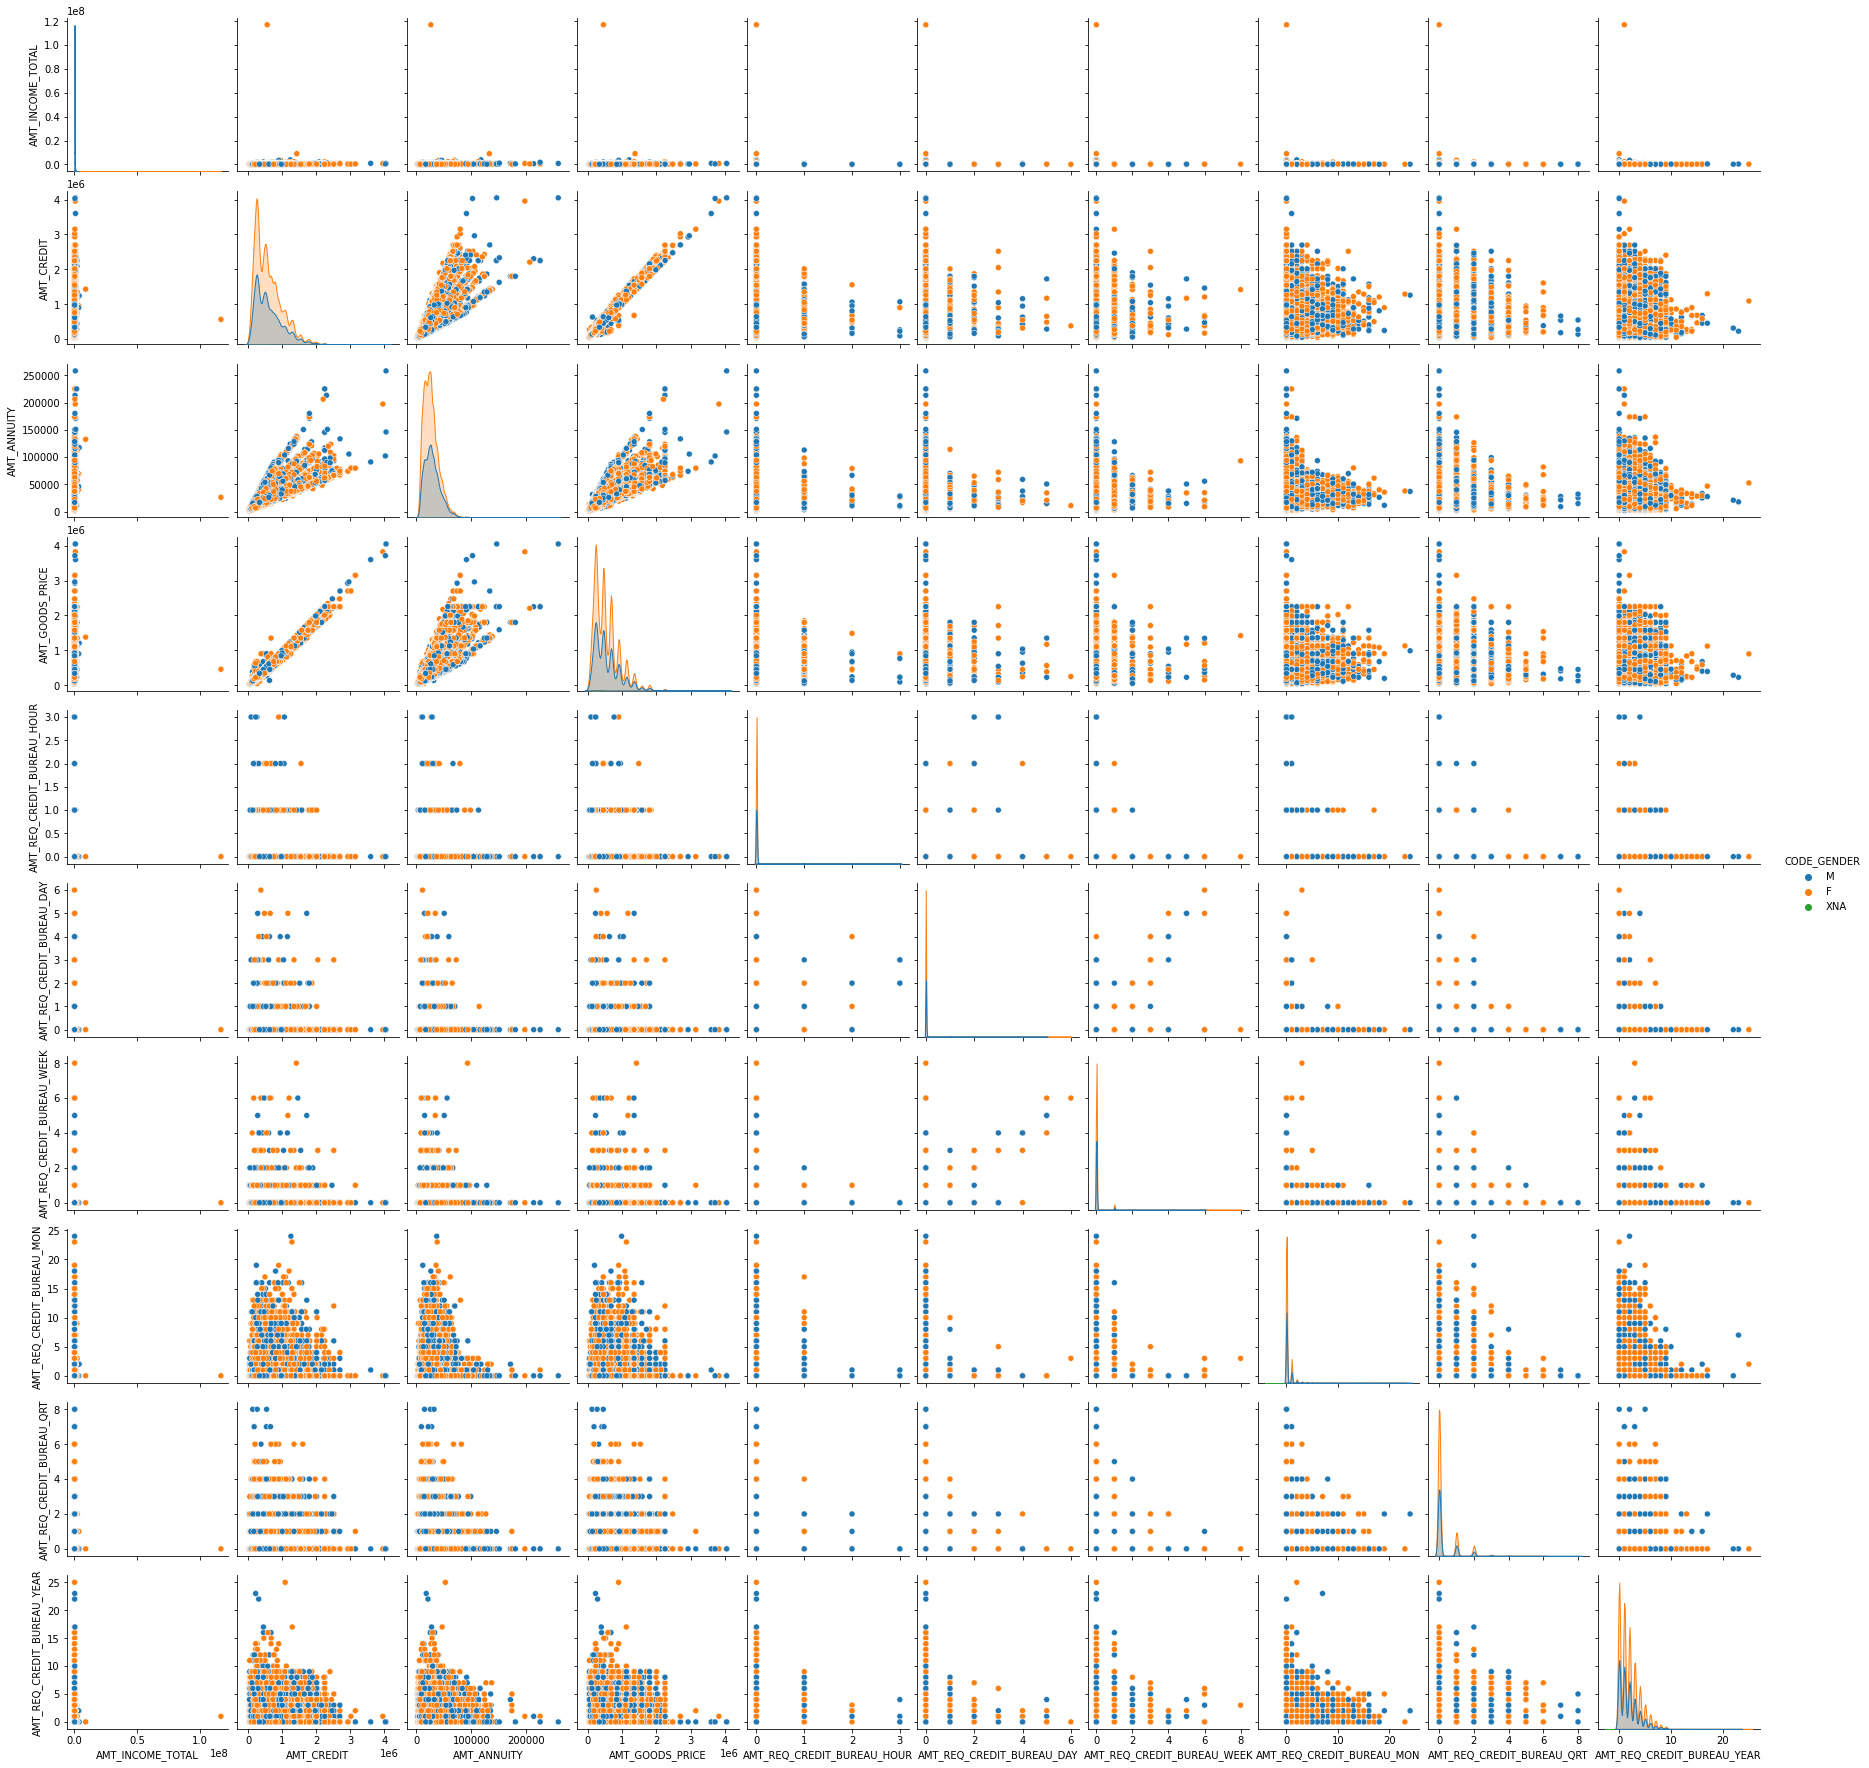

In [14]:
#graph the data for check the relation between the variables
sns.pairplot(data = dfB, hue= 'CODE_GENDER')

# Create a decision tree classifier without stratify param

In [182]:
X = dfB.drop(columns=['TARGET','CODE_GENDER'])
#columns to fill AMT_ANNUITY AMT_GOODS_PRICE	AMT_REQ_CREDIT_BUREAU_HOUR	AMT_REQ_CREDIT_BUREAU_DAY	AMT_REQ_CREDIT_BUREAU_WEEK	AMT_REQ_CREDIT_BUREAU_MON	AMT_REQ_CREDIT_BUREAU_QRT	AMT_REQ_CREDIT_BUREAU_YEAR with quantile 0.98
columns = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in columns:
    value = X[i].quantile(0.98)
    X[i] = X[i].replace(np.inf,value)
    X[i] = X[i].replace(-np.inf,value)
    X[i] = X[i].replace(np.nan,value)
#replace nan by 0 in X

y = dfB['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 30)

In [183]:
tree_model = DecisionTreeClassifier(max_depth=3) #Modelo "vacio"

In [184]:
# Ajustar el modelo
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [185]:
# Predicciones
y_pred = tree_model.predict(X_test)

In [186]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [187]:
y_test.values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [188]:
confusion_matrix(y_test,y_pred)

array([[27606,     1],
       [ 2393,     0]], dtype=int64)

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27607
           1       0.00      0.00      0.00      2393

    accuracy                           0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.85      0.92      0.88     30000



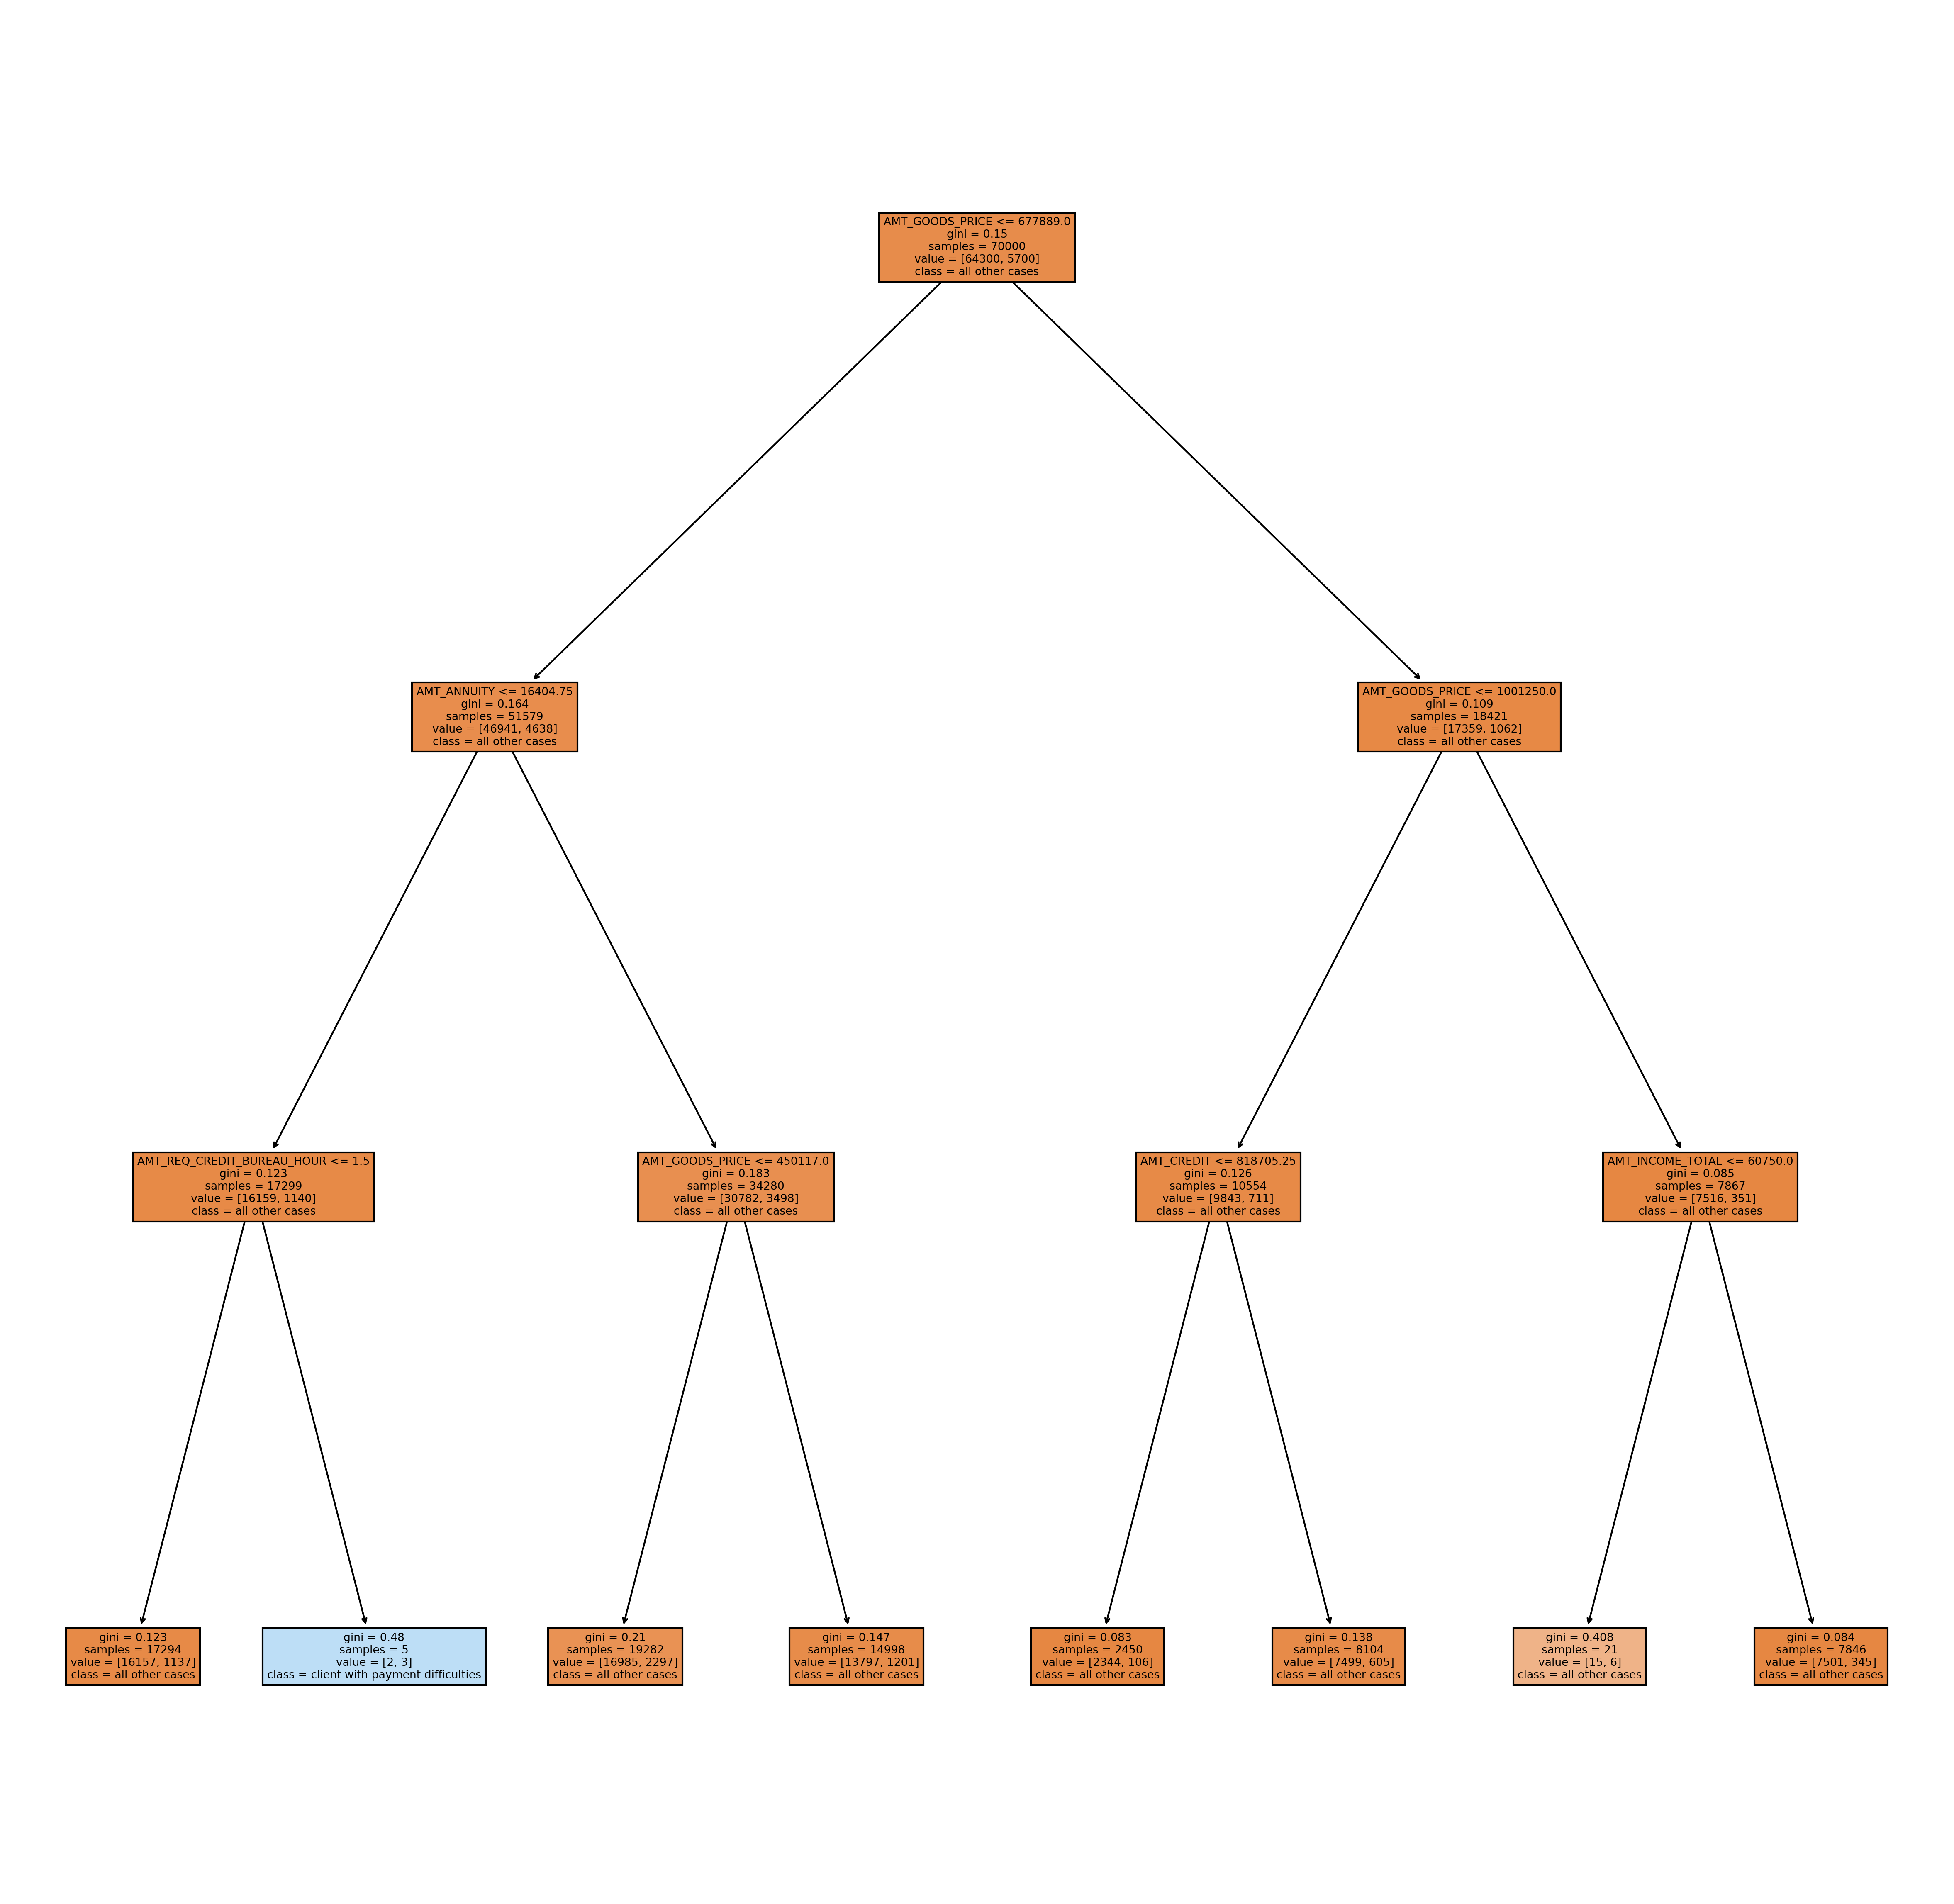

In [191]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20,20), dpi=300)
_ = tree.plot_tree(tree_model,feature_names = X_train.columns.values.tolist(), class_names=['all other cases','client with payment difficulties'],filled=True)
plt.savefig('arbol_without_stratify.png')

In [190]:
df_app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [191]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

In [192]:
y_train_pred = tree_model.predict(X_train) #Prediccion en Train
y_test_pred = tree_model.predict(X_test) #Prediccion en Test

In [193]:
#Calculo el accuracy en Train
decisionTree1_train = train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
decisionTree1_test = test_accuracy = accuracy_score(y_test, y_test_pred)
model = 'Decision Tree'
print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9185857142857143
% de aciertos sobre el set de evaluación: 0.9202


In [194]:
df_comparison = pd.DataFrame({'Train':[decisionTree1_train],'Test':[decisionTree1_test]}, index = [model])
df_comparison

,Train,Test
Decision Tree,0.918586,0.9202


# Create a decision tree classifier with stratify param

In [195]:
X = dfB.drop(columns=['TARGET','CODE_GENDER'])
#columns to fill AMT_ANNUITY AMT_GOODS_PRICE	AMT_REQ_CREDIT_BUREAU_HOUR	AMT_REQ_CREDIT_BUREAU_DAY	AMT_REQ_CREDIT_BUREAU_WEEK	AMT_REQ_CREDIT_BUREAU_MON	AMT_REQ_CREDIT_BUREAU_QRT	AMT_REQ_CREDIT_BUREAU_YEAR with quantile 0.98
columns = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in columns:
    value = X[i].quantile(0.98)
    X[i] = X[i].replace(np.inf,value)
    X[i] = X[i].replace(-np.inf,value)
    X[i] = X[i].replace(np.nan,value)
#replace nan by 0 in X

y = dfB['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 30, stratify=y)

In [196]:
tree_model = DecisionTreeClassifier(max_depth=3) #Modelo "vacio"

In [197]:
# Ajustar el modelo
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [198]:
# Predicciones
y_pred = tree_model.predict(X_test)

In [199]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [200]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [201]:
confusion_matrix(y_test,y_pred)

array([[27570,     2],
       [ 2428,     0]], dtype=int64)

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27572
           1       0.00      0.00      0.00      2428

    accuracy                           0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.84      0.92      0.88     30000



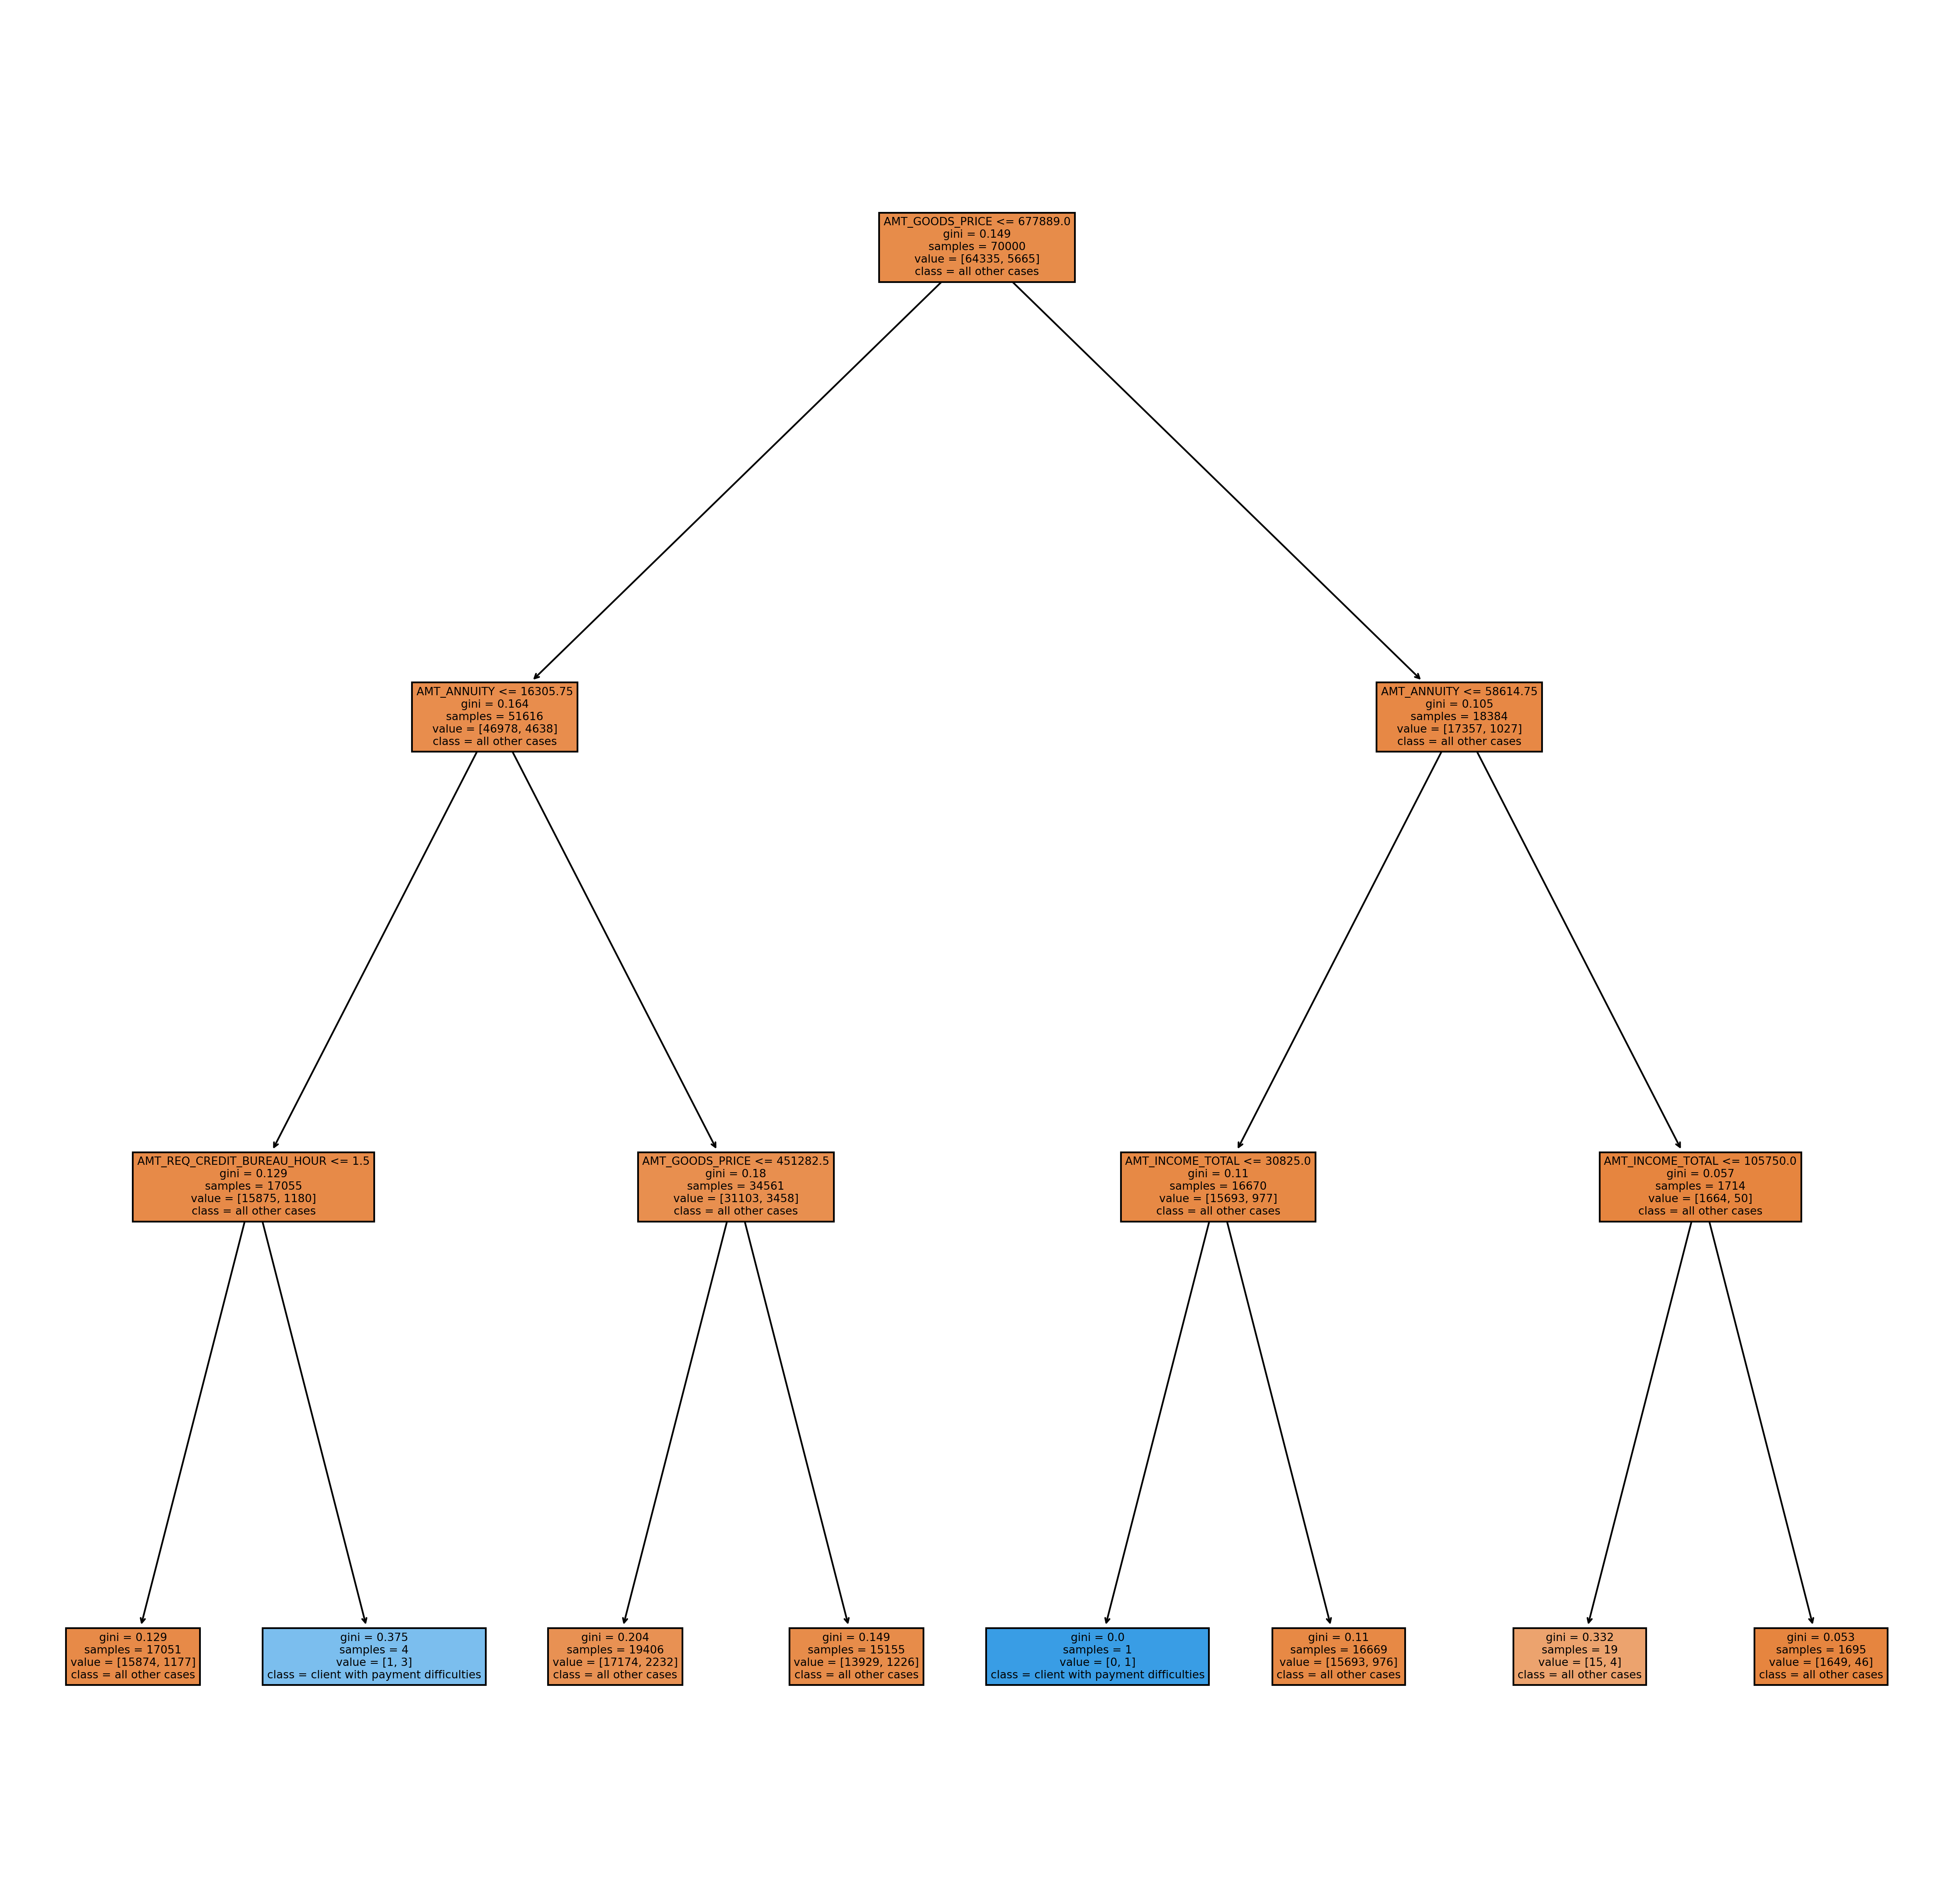

In [205]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20,20), dpi=300)
_ = tree.plot_tree(tree_model,feature_names = X_train.columns.values.tolist(), class_names=['all other cases','client with payment difficulties'],filled=True)
plt.savefig('arbol_stratify.png')

In [203]:
df_app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [204]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [205]:
y_train_pred = tree_model.predict(X_train) #Prediccion en Train
y_test_pred = tree_model.predict(X_test) #Prediccion en Test

In [206]:
#Calculo el accuracy en Train
decisionTree2_train = train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
decisionTree2_test = test_accuracy = accuracy_score(y_test, y_test_pred)
model = 'Decision Tree Optimized'

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9191142857142857
% de aciertos sobre el set de evaluación: 0.919


In [207]:
#add to df_comparision the results
df_comparison = pd.concat([df_comparison,pd.DataFrame({'Train':[decisionTree2_train],'Test':[decisionTree2_test]}, index = [model])],axis=0)
df_comparison

,Train,Test
Decision Tree,0.918586,0.9202
Decision Tree Optimized,0.919114,0.9190


# Create a KNN model

In [208]:
#analysis for GENDER of the clients and AMT columns
dfA = {}
for i in df_app:
    if 'CODE_GENDER' in i:
        dfA[i] = df_app[i]
    elif 'AMT' in i:
        dfA[i] = df_app[i]
    elif 'TARGET' in i:
        dfA[i] = df_app[i]

In [209]:
#here we need to limit the data for plotting
dfA = pd.DataFrame(dfA)
dfA.shape
dfB = dfA.iloc[:100000,:]

In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [211]:
#columns to fill AMT_ANNUITY AMT_GOODS_PRICE	AMT_REQ_CREDIT_BUREAU_HOUR	AMT_REQ_CREDIT_BUREAU_DAY	AMT_REQ_CREDIT_BUREAU_WEEK	AMT_REQ_CREDIT_BUREAU_MON	AMT_REQ_CREDIT_BUREAU_QRT	AMT_REQ_CREDIT_BUREAU_YEAR with quantile 0.98
columns = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in columns:
    value = dfB[i].quantile(0.98)
    dfB[i] = dfB[i].replace(np.inf,value)
    dfB[i] = dfB[i].replace(-np.inf,value)
    dfB[i] = dfB[i].replace(np.nan,value)

In [212]:
# Escalar, escalear, scalear
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [213]:
# Ajustar el modelo
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=30, stratify=y)

In [214]:
knn_model = KNeighborsClassifier(n_neighbors = 2) #Modelo vacío

In [215]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [216]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
y_test.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [218]:
confusion_matrix(y_test,y_pred)

array([[27358,   214],
       [ 2395,    33]], dtype=int64)

In [219]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     27572
           1       0.13      0.01      0.02      2428

    accuracy                           0.91     30000
   macro avg       0.53      0.50      0.49     30000
weighted avg       0.86      0.91      0.88     30000



In [223]:
def plot_knn(n,vars,X):
    b = min(4,int(np.floor(math.sqrt(n))))
    a = int(n/b)
    if(a*b!=n):
        a+=1
    fig, axes = plt.subplots(a,b, figsize=(a*6,b*7), sharey=True , sharex= False)
    scaler = StandardScaler()
    X = X[vars]
    X_scaled = scaler.fit_transform(X)
    X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=30)
    cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
    cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),np.arange(y_min, y_max, .05))
    for i in range(n):
        clf = KNeighborsClassifier(n_neighbors = i+1).fit(X_train_scaled,y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        axes.flat[i].set_title(f'# Vecinos: {i+1}, Train_score: {clf.score(X_train_scaled, y_train)},\nTest_score: {clf.score(X_test_scaled, y_test)}')
        axes.flat[i].pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto') 
        axes.flat[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
        axes.flat[i].set_xlim(xx.min(), xx.max())
        axes.flat[i].set_ylim(yy.min(), yy.max())
        axes.flat[i].set_xticks([])    
        patch0 = mpatches.Patch(color='#FFAAAA', label='all other cases')
        patch1 = mpatches.Patch(color='#c2f0c2', label='client with payment difficulties')
        axes.flat[i].legend(handles=[patch0, patch1])

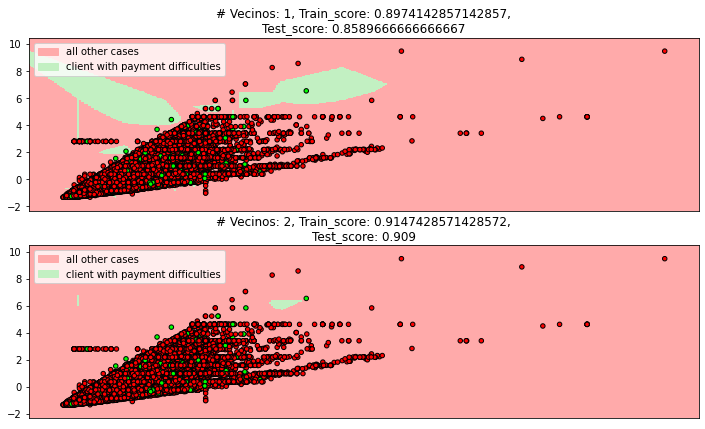

In [224]:
plot_knn(n=2,vars=['AMT_ANNUITY','AMT_GOODS_PRICE'],X=dfB)

In [220]:
y_train_pred = knn_model.predict(X_train) #Prediction of the training set
y_test_pred = knn_model.predict(X_test) #Prediction of the test set

c:\Users\Jhonathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Jhonathan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [154]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
from sklearn.model_selection import train_test_split 

In [157]:
#Calculo el accuracy en Train
knn_train = train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
knn_test = test_accuracy = accuracy_score(y_test, y_test_pred)
model = 'KNN'

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9190714285714285
% de aciertos sobre el set de evaluación: 0.9190666666666667


In [158]:
#add to df_comparision the results
df_comparison = pd.concat([df_comparison,pd.DataFrame({'Train':[knn_train],'Test':[knn_test]}, index = [model])],axis=0)
df_comparison

,Train,Test
Decision Tree,0.918586,0.9202
Decision Tree Optimized,0.919114,0.9190
KNN,0.919114,0.9190


# Create a Linear Regression Model

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
X = dfB.drop(columns=['TARGET','CODE_GENDER'])
#columns to fill AMT_ANNUITY AMT_GOODS_PRICE	AMT_REQ_CREDIT_BUREAU_HOUR	AMT_REQ_CREDIT_BUREAU_DAY	AMT_REQ_CREDIT_BUREAU_WEEK	AMT_REQ_CREDIT_BUREAU_MON	AMT_REQ_CREDIT_BUREAU_QRT	AMT_REQ_CREDIT_BUREAU_YEAR with quantile 0.98
columns = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in columns:
    value = X[i].quantile(0.98)
    X[i] = X[i].replace(np.inf,value)
    X[i] = X[i].replace(-np.inf,value)
    X[i] = X[i].replace(np.nan,value)
#replace nan by 0 in X

y = dfB['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 30, stratify=y)

In [161]:
regressor = LinearRegression() #Void Model
regressor.fit(X_train, y_train)

LinearRegression()

In [162]:
# Intersection of the model
print(regressor.intercept_)

0.0806895747990736


In [163]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
AMT_INCOME_TOTAL,-4.522479e-08
AMT_CREDIT,1.207988e-07
AMT_ANNUITY,9.110598e-07
AMT_GOODS_PRICE,-1.798899e-07
AMT_REQ_CREDIT_BUREAU_HOUR,2.633536e-02
AMT_REQ_CREDIT_BUREAU_DAY,9.200947e-03
AMT_REQ_CREDIT_BUREAU_WEEK,9.781959e-03
AMT_REQ_CREDIT_BUREAU_MON,-9.973750e-04
AMT_REQ_CREDIT_BUREAU_QRT,-2.811654e-03
AMT_REQ_CREDIT_BUREAU_YEAR,3.067607e-03


In [164]:
y_pred = regressor.predict(X_test)
y_pred

array([0.09404748, 0.06224737, 0.05995561, ..., 0.09314677, 0.06482091,
       0.07360972])

In [165]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
35917,0,0.094047
494,0,0.062247
56790,0,0.059956
73451,0,0.056322
73463,1,0.082846
...,...,...
25403,0,0.089984
40385,0,0.084808
6270,0,0.093147
30692,1,0.064821


In [166]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14849517150900227
Mean Squared Error: 0.07520691208552975
Root Mean Squared Error: 0.274238786617666


In [167]:
regression_train = train_accuracy = metrics.r2_score(y_train, regressor.predict(X_train))
regression_test = test_accuracy = metrics.r2_score(y_test, regressor.predict(X_test))

model = 'Linear Regression'

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.005149101716224291
% de aciertos sobre el set de evaluación: -0.011074866155084795


In [169]:
#add values with join to df_comparison
df_comparison = pd.concat([df_comparison,pd.DataFrame({'Train':[regression_train],'Test':[regression_test]}, index = [model])],axis=0)
df_comparison
#chance the index name to Model
df_comparison.index.name = 'Model'
df_comparison

,Train,Test
Model,,
Decision Tree,0.918586,0.920200
Decision Tree Optimized,0.919114,0.919000
KNN,0.919114,0.919000
Linear Regression,0.919114,0.919000
Linear Regression,0.005149,-0.011075
